# Volume 4: Optimal Control as Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Problem 1
Given the following cost functional and boundary conditions, solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
Plot your solutions for the optimal $x(t)$ and $u(t)$.

In [2]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    
    # initialize values for solve_bvp ##################################
    t_steps = np.linspace(0, 30, 200)
    y_guess = np.ones((4, 200))
    
    def ode(t, y):
        x = y[0]
        x_p = y[1]
        p_1 = y[2]
        p_2 = y[3]
        
        return np.array([x_p, (5/(4*np.pi))*p_2, 2*x, -p_1])
    
    def bc(y_a, y_b):
        return np.array([y_a[0], y_a[1] - 1, y_b[0] - 16, y_b[1] - 10])
    
    sol = solve_bvp(ode, bc, t_steps, y_guess).sol(t_steps)
    
    # plot results #####################################################   
    plt.plot(sol[0])
    plt.title('Prob 1')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.show()
    plt.plot(sol[3]*(5/(4*np.pi)))
    plt.xlabel('$t$')
    plt.ylabel('$u(t)$')
    plt.show()

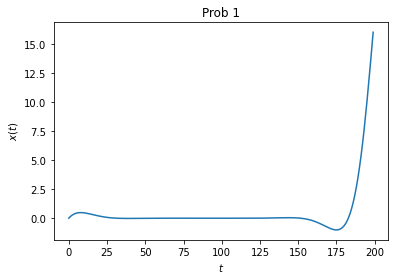

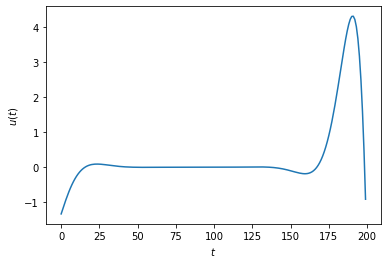

In [3]:
prob1()

## Problem 2 
Using the ODEs found in 14.7 and 14.11, the obstacle function 14.8, and the following boundary conditions and parameters solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}
You will need to choose a $W_1$ and $W_2$ which allow the solver to find a valid path.
If these parameters are not chosen correctly, the solver may find a path which goes through the obstacle, not around it.
Plot the obstacle using plt.contour() to be certain path doesn't pass through the obstacle.

In [4]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

In [5]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    # initialize values for solve_bvp ##################################
    t_0 = 0
    t_f = 20
    c_x = 4
    c_y = 1
    r_x = 5
    r_y = 0.5
    W_1 = 3
    W_2 = 3
    t_steps = np.linspace(t_0, t_f, 200)
    y_guess = np.ones((8, 200))
    
    def ode(t, var_inputs):
        x = var_inputs[0]
        y = var_inputs[1]
        x_p = var_inputs[2] 
        y_p = var_inputs[3] 
        p_1 = var_inputs[4] 
        p_2 = var_inputs[5] 
        p_3 = var_inputs[6] 
        p_4 = var_inputs[7] 
        C_x = obstacle_dx(x, y, W_1, r=(r_x, r_y,), c=(c_x, c_y))
        C_y = obstacle_dy(x, y, W_1, r=(r_x, r_y,), c=(c_x, c_y))
        
        return np.array([x_p, y_p, 0.5*(p_3/W_2), 0.5*(p_4/W_2), C_x, C_y, -p_1, -p_2])

    def bc(y_a, y_b):
        return np.array([y_a[0] - 6, y_a[1]-1.5, y_a[2], y_a[3], y_b[0], y_b[1], y_b[2], y_b[3]])
    
    sol = solve_bvp(ode, bc, t_steps, y_guess, max_nodes=30000).sol(t_steps)
    
    # plot results #####################################################   
    X, Y = np.meshgrid(np.linspace(0, 7, 200), np.linspace(0, 2, 200))
    ob = obstacle(X, Y, W_1, (r_x, r_y), (c_x, c_y))
    plt.contour(X, Y, ob)
    plt.plot(sol[0], sol[1], color='red', label='Optimal Path')
    plt.title('Prob 2')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()

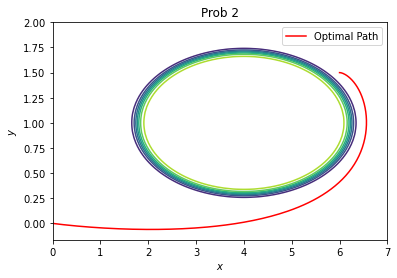

In [6]:
prob2()

## Problem 3
Solve the following boundary value problem:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}
Plot your solution. What $t_f$ did the solver find?

In [7]:
def prob3(): 
    '''
    Solve the free time horizon BVP.
    Plot the solution and return the correct end time
    '''
    # initialize values for solve_bvp ##################################
    t_steps = 100
    t = np.linspace(0, 1, t_steps)
    y_0 = np.ones((2, t_steps))
    p_0 = np.array([16])
    def ode(t, var_inputs, p):
        return p[0]*np.array([var_inputs[1], np.sin(p[0]*t) - 3*var_inputs[0]])  
    
    def bc(y_a, y_b, p):
        return np.array([y_a[0], y_b[0]-(np.pi/2), y_b[1] - 0.5*((np.sqrt(3)*np.pi/np.tan(np.pi*np.sqrt(75))) - 1)])
    
    sol = solve_bvp(ode, bc, t, y_0, p_0)

    # plot results #####################################################   
    plt.plot(sol.p[0]*t, sol.sol(t)[0])
    plt.title('Prob 3')
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    plt.show()
    
    return sol.p[0]

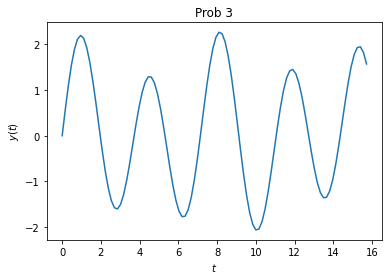

15.708053098880853


In [8]:
print(prob3())

## Problem 4
Refactor your code from problem 2 to create a free end time BVP and use a new boundary value derived from 14.14.
Plot the solution you found.
What is the optimal time?

In [9]:
def prob4():
    '''
    Find the optimal path and time for the free time horizon problem.
    Plot the solution and return the optimal time.
    '''
    # initialize values for solve_bvp ##################################
    t_0 = 0
    c_x = 4
    c_y = 1
    r_x = 5
    r_y = 0.5
    W_1 = 4
    W_2 = .1
    t_steps = np.linspace(t_0, 1, 200)
    y_guess = np.ones((8, 200))
    p_0 = np.array([5])
    
    def ode(t, var_inputs, p):
        x = var_inputs[0] #x
        y = var_inputs[1] #y
        x_p = var_inputs[2] #x'
        y_p = var_inputs[3] #y'
        p_1 = var_inputs[4] #p1
        p_2 = var_inputs[5] #p2
        p_3 = var_inputs[6] #p3
        p_4 = var_inputs[7] #p4
        C_x = obstacle_dx(x, y, W_1, r=(r_x, r_y,), c=(c_x, c_y))
        C_y = obstacle_dy(x, y, W_1, r=(r_x, r_y,), c=(c_x, c_y))
        
        return p[0]*np.array([x_p, y_p, 0.5*(p_3/W_2), 0.5*(p_4/W_2), C_x, C_y, -p_1, -p_2])
    
    def bc(y_a, y_b, p):
        H = y_b[4]*y_b[2] + y_b[5]*y_b[3] + y_b[6]*(0.5*(y_b[6]/W_2)) + y_b[7]*(0.5*(y_b[7]/W_2)) -\
            (1+(obstacle_dx(y_b[0], y_b[1], W_1, r=(r_x,r_y,), c=(c_x,c_y)))+W_2*((0.5*(y_b[6]/W_2))**2 + ((0.5*(y_b[7]/W_2))**2)))
        
        return np.array([y_a[0] - 6, y_a[1] - 1.5, y_a[2], y_a[3], y_b[0], y_b[1], y_b[2], y_b[3], H])
    
    sol = solve_bvp(ode, bc, t_steps, y_guess, p=p_0, max_nodes=30000)
    t_f = sol.p[0]
    sol = sol.sol(t_steps)   
    
    # plot results #####################################################   
    X, Y = np.meshgrid(np.linspace(0, 7, 200), np.linspace(0, 2, 200))
    ob = obstacle(X, Y, W_1, (r_x, r_y), (c_x, c_y))
    plt.contour(X, Y, ob)
    plt.plot(sol[0], sol[1], color='red', label='Optimal Path')
    plt.title('Prob 4')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()
    
    return t_f

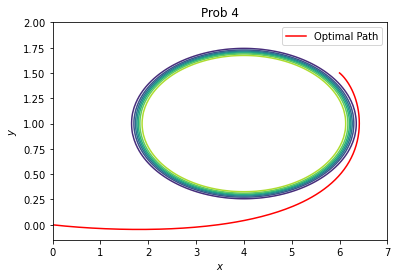

4.466960629235284


In [10]:
print(prob4())